### Dimensionality reduction via principal component analysis
    1. Standardize the d -dimensional dataset.

In [1]:
import pandas as pd

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [7]:
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

     2. Construct the covariance matrix.

$$
\sigma_{jk} = \frac{1}{n} \Sigma(x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)
$$
     
    3. Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [9]:
import numpy as np

In [12]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print 'Eigenvalues \n%s' % eigen_vals

Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


The variance explained ration on an eigen value $\lambda_j$.
$$
\frac{\lambda_j}{\Sigma_{j=1}^{d}\lambda_j}
$$

In [13]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [14]:
import matplotlib.pyplot as plt

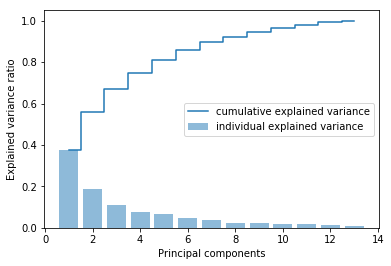

In [17]:
plt.bar(range(1, 14), var_exp, alpha=.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

    4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k d ≤ ).
    5. Construct a projection matrix W from the "top" k eigenvectors.

In [20]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [21]:
eigen_pairs

[(4.8923083032737438,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759231,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048446,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,

In [22]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print 'Matrix W:\n%s' % w

Matrix W:
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


    6. Transform the d -dimensional input dataset X using the projection matrix W to obtain the new k -dimensional feature subspace.

In [24]:
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

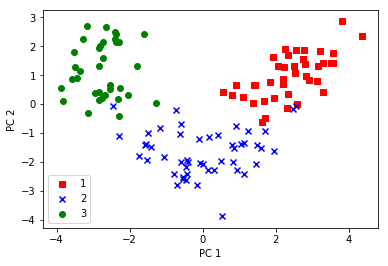

In [35]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    mask = np.array(y_train==l)
    plt.scatter(X_train_pca[mask, 0],
               X_train_pca[mask, 1],
               c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# PCA in scikit-learn
Now, let's use the PCA from scikitlearn on the Wine training dataset, classify the transformed samples via logistic regression, and visualize the decision regions via the plot_decision_region function.

In [36]:
from matplotlib.colors import ListedColormap

In [37]:
def plot_decision_regions(X, y, classifier, resolution=.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        mask = np.array(y==cl)
        plt.scatter(x=X[mask, 0], y=X[mask, 1],
                   alpha=.8, c=cmap(idx), marker=markers[idx], label=cl)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

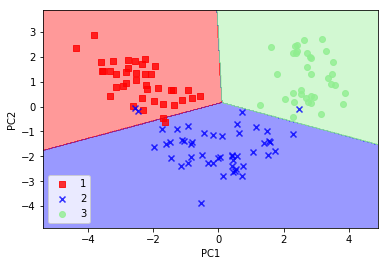

In [40]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

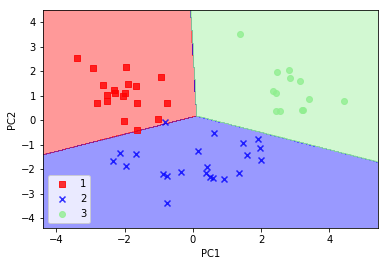

In [41]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [42]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])